In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.display import Markdown, display

# Datasets
from aif360.datasets import StandardDataset

# from PhysionetDataset.py import PhysionetDataset.py
# Dataset = PhysionetDataset.py


# Fairness metrics
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.metrics import ClassificationMetric

# Explainers
from aif360.explainers import MetricTextExplainer

# Scalers
from sklearn.preprocessing import StandardScaler

# Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Bias mitigation techniques
from aif360.algorithms.preprocessing import Reweighing
from aif360.algorithms.inprocessing import PrejudiceRemover

In [9]:
COLUMN_NAME = ["encounter_id","patient_nbr","race","gender","age"
    "admission_type_id","discharge_disposition_id","admission_source_id","time_in_hospital",
    "num_lab_procedures","num_procedures","num_medications","number_outpatient","number_emergency",
    "number_inpatient","diag_1","diag_2","diag_3","number_diagnoses","max_glu_serum",
    "A1Cresult","metformin","repaglinide","nateglinide","chlorpropamide","glimepiride","acetohexamide",
    "glipizide","glyburide","tolbutamide","pioglitazone","rosiglitazone","acarbose","miglitol",
    "troglitazone","tolazamide","examide","citoglipton","insulin","glyburide-metformin","glipizide-metformin",
    "glimepiride-pioglitazone","metformin-rosiglitazone","metformin-pioglitazone","change","diabetesMed",
    "readmitted"]

CATEGORICALS = ["encounter_id","patient_nbr","race","gender","age",
    "admission_type_id","discharge_disposition_id","admission_source_id","time_in_hospital",
    "diag_1","diag_2","diag_3","number_diagnoses","max_glu_serum",
    "A1Cresult","metformin","repaglinide","nateglinide","chlorpropamide","glimepiride","acetohexamide",
    "glipizide","glyburide","tolbutamide","pioglitazone","rosiglitazone","acarbose","miglitol",
    "troglitazone","tolazamide","examide","citoglipton","insulin","glyburide-metformin","glipizide-metformin",
    "glimepiride-pioglitazone","metformin-rosiglitazone","metformin-pioglitazone","change","diabetesMed",
    "readmitted"]

In [10]:
#Diabetes Dataset
#https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008
#Attribute Description: https://www.hindawi.com/journals/bmri/2014/781670/tab1/

#YOU CANNOT HAVE THE label_name AND protected_attribute_names IN categorical_features
np.random.seed(1)

default_mappings = {
    'label_maps': [{1.0: '1'}],
    'protected_attribute_maps': [{1.0: 'Male', 0.0: 'Female'}]
}


filepath = r'C:\Users\sujin\Documents\College\PhD_Project\Project/EditedData/BalancedProtectedAttributes/diabetes_balance_NoCol.csv'
filepath2 = r'C:\Users\sujin\Documents\College\PhD_Project\Project/EditedData/BalancedProtectedAttributes/diabetes_balance.csv'
df2 = pd.read_csv(filepath2)
df3=df2
df3.drop(['num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 
                'number_diagnoses'], axis=1)
categorical_attributes = df3.columns

column_names = df2.columns


class DiabetesDataset(StandardDataset):

    def __init__(self, label_name='readmitted',
                 favorable_classes=[1],
                 protected_attribute_names=['gender'],
                 privileged_classes=[[1]],
                 instance_weights_name=None,
                 categorical_features=["encounter_id","patient_nbr","race","age",
                                        "admission_type_id","discharge_disposition_id","admission_source_id","time_in_hospital",
                                        "diag_1","diag_2","diag_3","number_diagnoses","max_glu_serum",
                                        "A1Cresult","metformin","repaglinide","nateglinide","chlorpropamide","glimepiride","acetohexamide",
                                        "glipizide","glyburide","tolbutamide","pioglitazone","rosiglitazone","acarbose","miglitol",
                                        "troglitazone","tolazamide","examide","citoglipton","insulin","glyburide-metformin","glipizide-metformin",
                                        "glimepiride-pioglitazone","metformin-rosiglitazone","metformin-pioglitazone","change","diabetesMed"],
                 features_to_keep=[], features_to_drop=["encounter_id","patient_nbr"],
                 na_values=[], custom_preprocessing=None,
                 metadata=default_mappings):



        try:
            df = pd.read_csv(filepath, header=None, names=column_names)
            df.drop(df[df.gender == 'Unknown/Invalid'].index, inplace=True)
            df['gender'] = df['gender'].astype(int)
        
            print(df.head())
        except IOError as err:
            print("IOError: {}".format(err))
            print("To use this class, please download the following files:")
            print("\n\thttps://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data")
            print("\thttps://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.doc")
            print("\nand place them, as-is, in the folder:")
            print("\n\t{}\n".format(os.path.abspath(os.path.join(
                os.path.abspath(__file__), '..', '..', 'data', 'raw', 'german'))))
            import sys
            sys.exit(1)

        super(DiabetesDataset, self).__init__(df=df, label_name=label_name,
                                               favorable_classes=favorable_classes,
                                               protected_attribute_names=protected_attribute_names,
                                               privileged_classes=privileged_classes,
                                               instance_weights_name=instance_weights_name,
                                               categorical_features=categorical_features,
                                               features_to_keep=features_to_keep,
                                               features_to_drop=features_to_drop, na_values=na_values,
                                               custom_preprocessing=custom_preprocessing, metadata=metadata)


In [11]:


filepath2 = r'C:\Users\sujin\Documents\College\PhD_Project\Project\Diabetes_Columns.csv'
df2 = pd.read_csv(filepath2)
df = pd.read_csv(filepath, header=None, names=df2.columns)
df['gender'].unique()
df.drop(df[df.gender == 'Unknown/Invalid'].index, inplace=True)
df['gender'] = df['gender'].astype(int)
df.loc[df['gender'] == 0]



,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,0,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,No,0
1,149190,55629189,Caucasian,0,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,1
2,64410,86047875,AfricanAmerican,0,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,0
10,28236,89869032,AfricanAmerican,0,[40-50),1,1,7,9,47,...,No,Steady,No,No,No,No,No,No,Yes,1
12,40926,85504905,Caucasian,0,[40-50),1,3,7,7,60,...,No,Down,No,No,No,No,No,Ch,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101756,443842070,140199494,Other,0,[60-70),1,1,7,2,46,...,No,Steady,No,No,No,No,No,No,Yes,1
101757,443842136,181593374,Caucasian,0,[70-80),1,1,7,5,21,...,No,Steady,No,No,No,No,No,No,Yes,0
101758,443842340,120975314,Caucasian,0,[80-90),1,1,7,5,76,...,No,Up,No,No,No,No,No,Ch,Yes,0
101760,443847176,50375628,AfricanAmerican,0,[60-70),1,1,7,6,45,...,No,Down,No,No,No,No,No,Ch,Yes,1


In [12]:
# 3.1. Load data & create splits for learning/validating/testing model¶


(dataset_orig_train, dataset_orig_val, dataset_orig_test) = DiabetesDataset().split([0.5, 0.8], shuffle=True)

sens_ind = 0
sens_attr = dataset_orig_train.protected_attribute_names[sens_ind]

unprivileged_groups = [{sens_attr: v} for v in
                       dataset_orig_train.unprivileged_protected_attributes[sens_ind]]

privileged_groups = [{sens_attr: v} for v in
                     dataset_orig_train.privileged_protected_attributes[sens_ind]]


def describe(train=None, val=None, test=None):
    if train is not None:
        display(Markdown("#### Training Dataset shape"))
        print(train.features.shape)
    if val is not None:
        display(Markdown("#### Validation Dataset shape"))
        print(val.features.shape)
    display(Markdown("#### Test Dataset shape"))
    print(test.features.shape)
    display(Markdown("#### Favorable and unfavorable labels"))
    print(test.favorable_label, test.unfavorable_label)
    display(Markdown("#### Protected attribute names"))
    print(test.protected_attribute_names)
    display(Markdown("#### Privileged and unprivileged protected attribute values"))
    print(test.privileged_protected_attributes,
          test.unprivileged_protected_attributes)
    display(Markdown("#### Dataset feature names"))
    print(test.feature_names)


describe(dataset_orig_train, dataset_orig_val, dataset_orig_test)

metric_orig_train = BinaryLabelDatasetMetric(
    dataset_orig_train,
    unprivileged_groups=unprivileged_groups,
    privileged_groups=privileged_groups)
explainer_orig_panel19_train = MetricTextExplainer(metric_orig_train)

print(explainer_orig_panel19_train.disparate_impact())

   Unnamed: 0  encounter_id  patient_nbr             race  gender      age  \
0           0       2278392      8222157        Caucasian       0   [0-10)   
1           1        149190     55629189        Caucasian       0  [10-20)   
2           2         64410     86047875  AfricanAmerican       0  [20-30)   
3          10         28236     89869032  AfricanAmerican       0  [40-50)   
4          12         40926     85504905        Caucasian       0  [40-50)   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         3                    7   

   time_in_hospital  ...  citoglipton  insulin  glyburide-metformin  \
0                 1  ...         

#### Training Dataset shape

(47055, 2422)


#### Validation Dataset shape

(28233, 2422)


#### Test Dataset shape

(18822, 2422)


#### Favorable and unfavorable labels

1.0 0.0


#### Protected attribute names

['gender']


#### Privileged and unprivileged protected attribute values

[array([1.])] [array([0.])]


#### Dataset feature names

['Unnamed: 0', 'gender', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'race=?', 'race=AfricanAmerican', 'race=Asian', 'race=Caucasian', 'race=Hispanic', 'race=Other', 'age=[0-10)', 'age=[10-20)', 'age=[20-30)', 'age=[30-40)', 'age=[40-50)', 'age=[50-60)', 'age=[60-70)', 'age=[70-80)', 'age=[80-90)', 'age=[90-100)', 'admission_type_id=1', 'admission_type_id=2', 'admission_type_id=3', 'admission_type_id=4', 'admission_type_id=5', 'admission_type_id=6', 'admission_type_id=7', 'admission_type_id=8', 'discharge_disposition_id=1', 'discharge_disposition_id=2', 'discharge_disposition_id=3', 'discharge_disposition_id=4', 'discharge_disposition_id=5', 'discharge_disposition_id=6', 'discharge_disposition_id=7', 'discharge_disposition_id=8', 'discharge_disposition_id=9', 'discharge_disposition_id=10', 'discharge_disposition_id=11', 'discharge_disposition_id=12', 'discharge_disposition_id=13', 'discharge_disposition_id=14',

In [13]:
# 3.2. Learning a Logistic Regression (LR) classifier on original data¶
# 3.2.1. Training LR model on original data

dataset = dataset_orig_train
model = make_pipeline(StandardScaler(),
                      LogisticRegression(solver='liblinear', random_state=1))
fit_params = {'logisticregression__sample_weight': dataset.instance_weights}

lr_orig = model.fit(dataset.features, dataset.labels.ravel(), **fit_params)

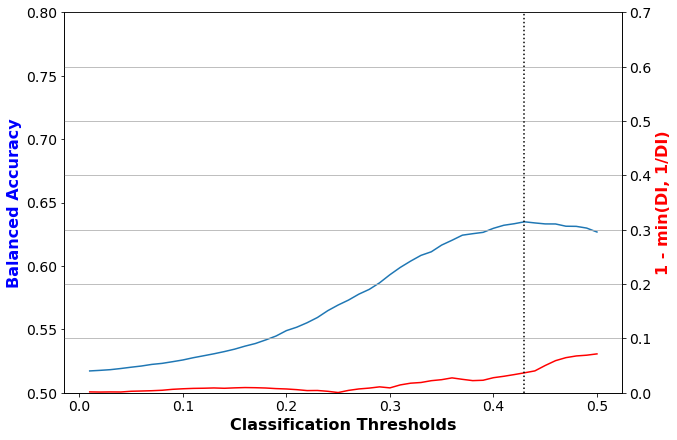

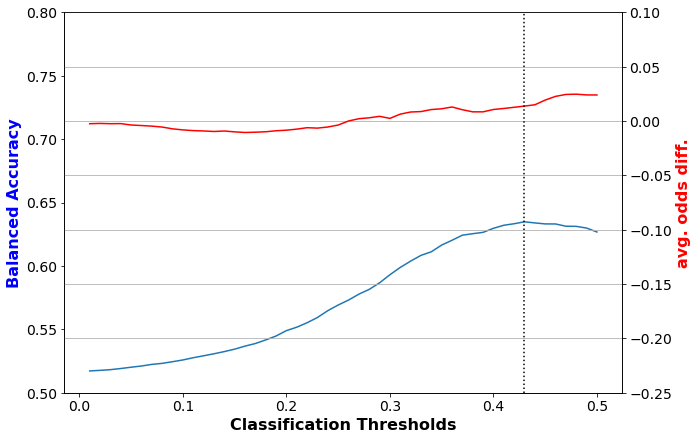

Validation Scores:
Threshold corresponding to Best balanced accuracy: 0.4300
Best balanced accuracy: 0.6348
Corresponding 1-min(DI, 1/DI) value: 0.0368
Corresponding average odds difference value: 0.0137
Corresponding statistical parity difference value: 0.0204
Corresponding equal opportunity difference value: 0.0106
Corresponding Theil index value: 0.2120


In [14]:
# 3.2.2. Validating LR model on original data¶

from collections import defaultdict


def test(dataset, model, thresh_arr):
    try:
        # sklearn classifier
        y_val_pred_prob = model.predict_proba(dataset.features)
        pos_ind = np.where(model.classes_ == dataset.favorable_label)[0][0]
    except AttributeError:
        # aif360 inprocessing algorithm
        y_val_pred_prob = model.predict(dataset).scores
        pos_ind = 0

    metric_arrs = defaultdict(list)
    for thresh in thresh_arr:
        y_val_pred = (y_val_pred_prob[:, pos_ind] > thresh).astype(np.float64)

        dataset_pred = dataset.copy()
        dataset_pred.labels = y_val_pred
        metric = ClassificationMetric(
            dataset, dataset_pred,
            unprivileged_groups=unprivileged_groups,
            privileged_groups=privileged_groups)

        metric_arrs['bal_acc'].append((metric.true_positive_rate()
                                       + metric.true_negative_rate()) / 2)
        metric_arrs['avg_odds_diff'].append(metric.average_odds_difference())
        metric_arrs['disp_imp'].append(metric.disparate_impact())
        metric_arrs['stat_par_diff'].append(metric.statistical_parity_difference())
        metric_arrs['eq_opp_diff'].append(metric.equal_opportunity_difference())
        metric_arrs['theil_ind'].append(metric.theil_index())

    return metric_arrs


thresh_arr = np.linspace(0.01, 0.5, 50)
val_metrics = test(dataset=dataset_orig_val,
                   model=lr_orig,
                   thresh_arr=thresh_arr)
lr_orig_best_ind = np.argmax(val_metrics['bal_acc'])


def plot(x, x_name, y_left, y_left_name, y_right, y_right_name):
    fig, ax1 = plt.subplots(figsize=(10, 7))
    ax1.plot(x, y_left)
    ax1.set_xlabel(x_name, fontsize=16, fontweight='bold')
    ax1.set_ylabel(y_left_name, color='b', fontsize=16, fontweight='bold')
    ax1.xaxis.set_tick_params(labelsize=14)
    ax1.yaxis.set_tick_params(labelsize=14)
    ax1.set_ylim(0.5, 0.8)

    ax2 = ax1.twinx()
    ax2.plot(x, y_right, color='r')
    ax2.set_ylabel(y_right_name, color='r', fontsize=16, fontweight='bold')
    if 'DI' in y_right_name:
        ax2.set_ylim(0., 0.7)
    else:
        ax2.set_ylim(-0.25, 0.1)

    best_ind = np.argmax(y_left)
    ax2.axvline(np.array(x)[best_ind], color='k', linestyle=':')
    ax2.yaxis.set_tick_params(labelsize=14)
    ax2.grid(True)
    plt.show()
    
    
disp_imp = np.array(val_metrics['disp_imp'])
disp_imp_err = 1 - np.minimum(disp_imp, 1 / disp_imp)
plot(thresh_arr, 'Classification Thresholds',
     val_metrics['bal_acc'], 'Balanced Accuracy',
     disp_imp_err, '1 - min(DI, 1/DI)')

plot(thresh_arr, 'Classification Thresholds',
     val_metrics['bal_acc'], 'Balanced Accuracy',
     val_metrics['avg_odds_diff'], 'avg. odds diff.')

def describe_metrics(metrics, thresh_arr):
    best_ind = np.argmax(metrics['bal_acc'])
    print("Threshold corresponding to Best balanced accuracy: {:6.4f}".format(thresh_arr[best_ind]))
    print("Best balanced accuracy: {:6.4f}".format(metrics['bal_acc'][best_ind]))
#     disp_imp_at_best_ind = np.abs(1 - np.array(metrics['disp_imp']))[best_ind]
    disp_imp_at_best_ind = 1 - min(metrics['disp_imp'][best_ind], 1/metrics['disp_imp'][best_ind])
    print("Corresponding 1-min(DI, 1/DI) value: {:6.4f}".format(disp_imp_at_best_ind))
    print("Corresponding average odds difference value: {:6.4f}".format(metrics['avg_odds_diff'][best_ind]))
    print("Corresponding statistical parity difference value: {:6.4f}".format(metrics['stat_par_diff'][best_ind]))
    print("Corresponding equal opportunity difference value: {:6.4f}".format(metrics['eq_opp_diff'][best_ind]))
    print("Corresponding Theil index value: {:6.4f}".format(metrics['theil_ind'][best_ind]))


print("Validation Scores:")
describe_metrics(val_metrics, thresh_arr)

In [15]:
#3.2.3. Testing LR model on original data¶

print("Test Scores:")
lr_orig_metrics = test(dataset=dataset_orig_test,
                       model=lr_orig,
                       thresh_arr=[thresh_arr[lr_orig_best_ind]])

describe_metrics(lr_orig_metrics, [thresh_arr[lr_orig_best_ind]])

#4. Bias mitigation using pre-processing technique - Reweighing¶

#4.1. Transform data¶
RW = Reweighing(unprivileged_groups=unprivileged_groups,
                privileged_groups=privileged_groups)
dataset_transf_train = RW.fit_transform(dataset_orig_train)

#Metrics for transformed data

metric_transf_train = BinaryLabelDatasetMetric(
        dataset_transf_train,
        unprivileged_groups=unprivileged_groups,
        privileged_groups=privileged_groups)
explainer_transf_train = MetricTextExplainer(metric_transf_train)

print(explainer_transf_train.disparate_impact())

Test Scores:
Threshold corresponding to Best balanced accuracy: 0.4300
Best balanced accuracy: 0.6302
Corresponding 1-min(DI, 1/DI) value: 0.0390
Corresponding average odds difference value: 0.0149
Corresponding statistical parity difference value: 0.0216
Corresponding equal opportunity difference value: 0.0266
Corresponding Theil index value: 0.2092
Disparate impact (probability of favorable outcome for unprivileged instances / probability of favorable outcome for privileged instances): 1.0000000000000004


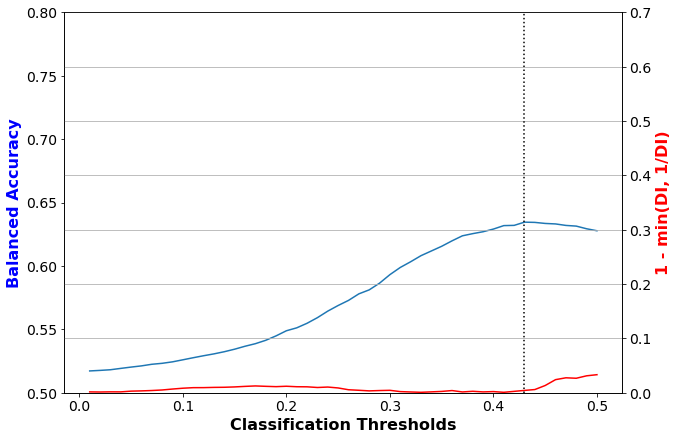

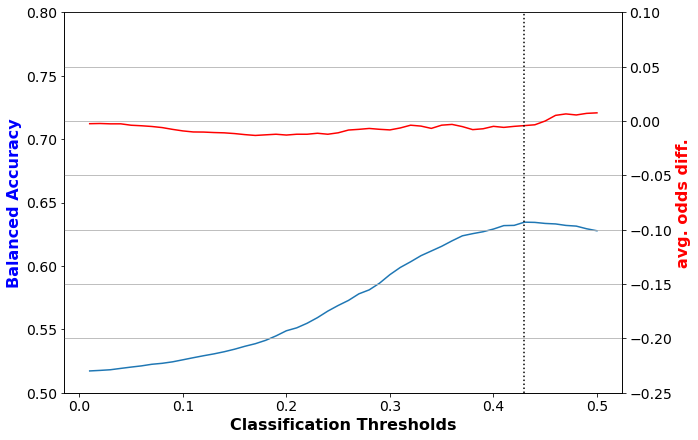

Threshold corresponding to Best balanced accuracy: 0.4300
Best balanced accuracy: 0.6345
Corresponding 1-min(DI, 1/DI) value: 0.0044
Corresponding average odds difference value: -0.0042
Corresponding statistical parity difference value: 0.0024
Corresponding equal opportunity difference value: -0.0064
Corresponding Theil index value: 0.2122


In [16]:
#4.2. Learning a Logistic Regression (LR) classifier on data transformed by reweighing¶

#4.2.1. Training LR model after reweighing¶
dataset = dataset_transf_train
model = make_pipeline(StandardScaler(),
                      LogisticRegression(solver='liblinear', random_state=1))
fit_params = {'logisticregression__sample_weight': dataset.instance_weights}
lr_transf = model.fit(dataset.features, dataset.labels.ravel(), **fit_params)

#4.2.2. Validating LR model after reweighing¶


thresh_arr = np.linspace(0.01, 0.5, 50)
val_metrics = test(dataset=dataset_orig_val,
                   model=lr_transf,
                   thresh_arr=thresh_arr)
lr_transf_best_ind = np.argmax(val_metrics['bal_acc'])

disp_imp = np.array(val_metrics['disp_imp'])
disp_imp_err = 1 - np.minimum(disp_imp, 1/disp_imp)

plot(thresh_arr, 'Classification Thresholds',
     val_metrics['bal_acc'], 'Balanced Accuracy',
     disp_imp_err, '1 - min(DI, 1/DI)')

plot(thresh_arr, 'Classification Thresholds',
     val_metrics['bal_acc'], 'Balanced Accuracy',
     val_metrics['avg_odds_diff'], 'avg. odds diff.')

describe_metrics(val_metrics, thresh_arr)


In [17]:
#4.2.3. Testing LR model after reweighing¶
lr_transf_metrics = test(dataset=dataset_orig_test,
                         model=lr_transf,
                         thresh_arr=[thresh_arr[lr_transf_best_ind]])
describe_metrics(lr_transf_metrics, [thresh_arr[lr_transf_best_ind]])


Threshold corresponding to Best balanced accuracy: 0.4300
Best balanced accuracy: 0.6298
Corresponding 1-min(DI, 1/DI) value: 0.0131
Corresponding average odds difference value: 0.0004
Corresponding statistical parity difference value: 0.0072
Corresponding equal opportunity difference value: 0.0118
Corresponding Theil index value: 0.2097


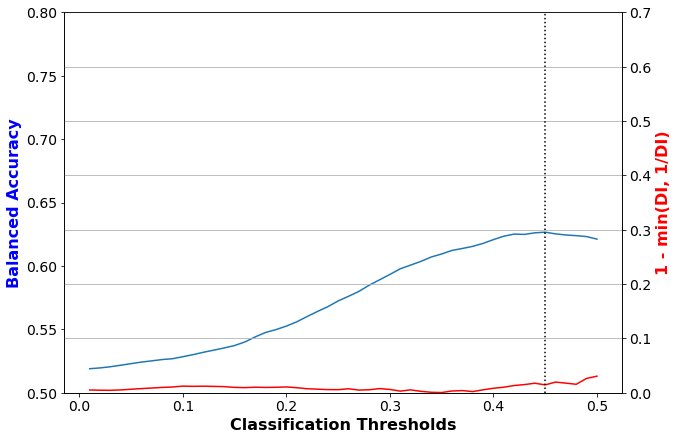

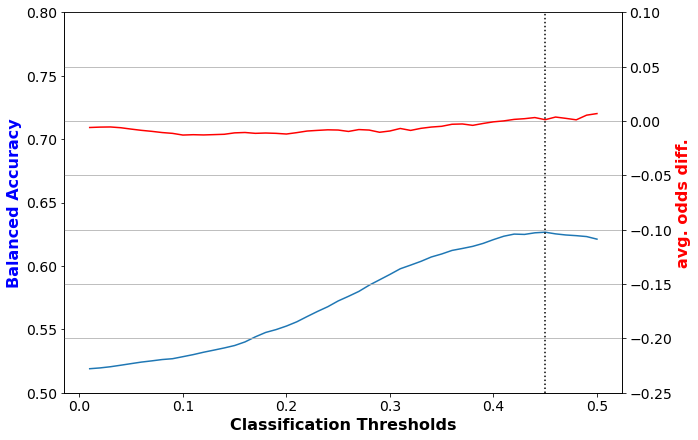

Threshold corresponding to Best balanced accuracy: 0.4500
Best balanced accuracy: 0.6266
Corresponding 1-min(DI, 1/DI) value: 0.0145
Corresponding average odds difference value: 0.0012
Corresponding statistical parity difference value: 0.0074
Corresponding equal opportunity difference value: -0.0000
Corresponding Theil index value: 0.2386


In [18]:
#5. Bias mitigation using in-processing technique - Prejudice Remover (PR)¶

#5.1.1. Training a PR model
model = PrejudiceRemover(sensitive_attr=sens_attr, eta=25.0)
pr_orig_scaler = StandardScaler()

dataset = dataset_orig_train.copy()
dataset.features = pr_orig_scaler.fit_transform(dataset.features)

pr_orig = model.fit(dataset)

#5.1.2. Validating PR model¶

thresh_arr = np.linspace(0.01, 0.50, 50)

dataset = dataset_orig_val.copy()
dataset.features = pr_orig_scaler.transform(dataset.features)

val_metrics = test(dataset=dataset,
                   model=pr_orig,
                   thresh_arr=thresh_arr)
pr_orig_best_ind = np.argmax(val_metrics['bal_acc'])
disp_imp = np.array(val_metrics['disp_imp'])
disp_imp_err = 1 - np.minimum(disp_imp, 1/disp_imp)

plot(thresh_arr, 'Classification Thresholds',
     val_metrics['bal_acc'], 'Balanced Accuracy',
     disp_imp_err, '1 - min(DI, 1/DI)')

plot(thresh_arr, 'Classification Thresholds',
     val_metrics['bal_acc'], 'Balanced Accuracy',
     val_metrics['avg_odds_diff'], 'avg. odds diff.')

describe_metrics(val_metrics, thresh_arr)


In [19]:
#5.1.3. Testing PR model¶

dataset = dataset_orig_test.copy()
dataset.features = pr_orig_scaler.transform(dataset.features)

pr_orig_metrics = test(dataset=dataset,
                       model=pr_orig,
                       thresh_arr=[thresh_arr[pr_orig_best_ind]])
describe_metrics(pr_orig_metrics, [thresh_arr[pr_orig_best_ind]])

Threshold corresponding to Best balanced accuracy: 0.4500
Best balanced accuracy: 0.6230
Corresponding 1-min(DI, 1/DI) value: 0.0180
Corresponding average odds difference value: 0.0020
Corresponding statistical parity difference value: 0.0091
Corresponding equal opportunity difference value: 0.0051
Corresponding Theil index value: 0.2339


In [20]:
import pandas as pd
pd.set_option('display.multi_sparse', False)
results = [lr_orig_metrics, lr_transf_metrics,
            pr_orig_metrics]
debias = pd.Series([''] + ['Reweighing']
                 + ['Prejudice Remover'],
                   name='Bias Mitigator')
clf = pd.Series(['Logistic Regression']*2 + [''],
                name='Classifier')
pd.concat([pd.DataFrame(metrics) for metrics in results], axis=0).set_index([debias, clf])

,,bal_acc,avg_odds_diff,disp_imp,stat_par_diff,eq_opp_diff,theil_ind
Bias Mitigator,Classifier,,,,,,
,Logistic Regression,0.630193,0.014905,1.040622,0.021608,0.026570,0.209229
Reweighing,Logistic Regression,0.629830,0.000439,1.013294,0.007163,0.011808,0.209666
Prejudice Remover,,0.623010,0.001996,1.018297,0.009107,0.005058,0.233914


In [21]:
#Disparate Impact Remover

from aif360.algorithms.preprocessing import DisparateImpactRemover


In [22]:
#3.2.3. Testing LR model on original data¶

print("Test Scores:")
lr_orig_metrics = test(dataset=dataset_orig_test,
                       model=lr_orig,
                       thresh_arr=[thresh_arr[lr_orig_best_ind]])

describe_metrics(lr_orig_metrics, [thresh_arr[lr_orig_best_ind]])

#4. Bias mitigation using pre-processing technique - Disparate Impact Remover¶

#4.1. Transform data¶


di = DisparateImpactRemover(repair_level=1.0)
dataset_transf_train = di.fit_transform(dataset_orig_train)
dataset_transf_test = di.fit_transform(dataset_orig_test)

#Metrics for transformed data

metric_transf_train = BinaryLabelDatasetMetric(
        dataset_transf_train,
        unprivileged_groups=unprivileged_groups,
        privileged_groups=privileged_groups)
explainer_transf_train = MetricTextExplainer(metric_transf_train)

print(explainer_transf_train.disparate_impact())

Test Scores:
Threshold corresponding to Best balanced accuracy: 0.4300
Best balanced accuracy: 0.6302
Corresponding 1-min(DI, 1/DI) value: 0.0390
Corresponding average odds difference value: 0.0149
Corresponding statistical parity difference value: 0.0216
Corresponding equal opportunity difference value: 0.0266
Corresponding Theil index value: 0.2092
Disparate impact (probability of favorable outcome for unprivileged instances / probability of favorable outcome for privileged instances): 1.0194860368287975


Threshold corresponding to Best balanced accuracy: 0.4500
Best balanced accuracy: 0.6388
Corresponding 1-min(DI, 1/DI) value: 0.0803
Corresponding average odds difference value: 0.0354
Corresponding statistical parity difference value: 0.0419
Corresponding equal opportunity difference value: 0.0367
Corresponding Theil index value: 0.2312


Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


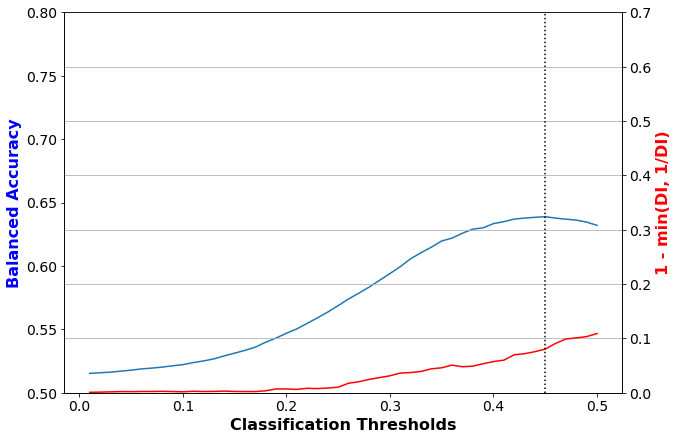

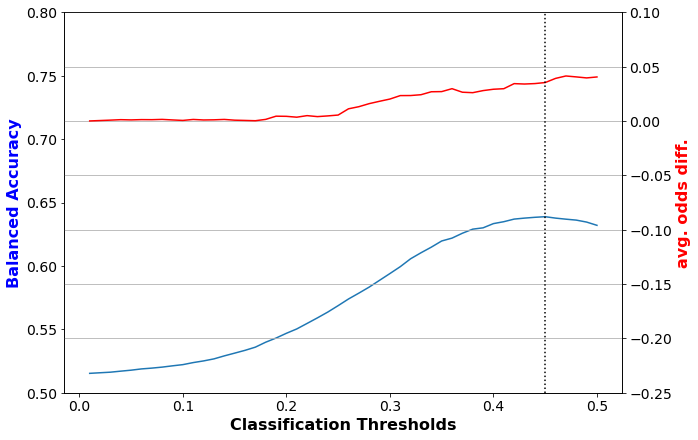

In [23]:
#4.2.1. Training LR model after Disparate Impact Remover¶
dataset = dataset_transf_train
model = make_pipeline(StandardScaler(),
                      LogisticRegression(solver='liblinear', random_state=1))
fit_params = {'logisticregression__sample_weight': dataset.instance_weights}
lr_transf = model.fit(dataset.features, dataset.labels.ravel(), **fit_params)

#4.2.2. Validating LR model after Disdparate impact Remover¶


thresh_arr = np.linspace(0.01, 0.5, 50)
val_metrics = test(dataset=dataset_orig_val,
                   model=lr_transf,
                   thresh_arr=thresh_arr)
lr_transf_best_ind = np.argmax(val_metrics['bal_acc'])

disp_imp = np.array(val_metrics['disp_imp'])
disp_imp_err = 1 - np.minimum(disp_imp, 1/disp_imp)

plot(thresh_arr, 'Classification Thresholds',
     val_metrics['bal_acc'], 'Balanced Accuracy',
     disp_imp_err, '1 - min(DI, 1/DI)')

plot(thresh_arr, 'Classification Thresholds',
     val_metrics['bal_acc'], 'Balanced Accuracy',
     val_metrics['avg_odds_diff'], 'avg. odds diff.')

describe_metrics(val_metrics, thresh_arr)

In [24]:
#Test LR DIR Model

lr_metrics_DIR = test(dataset=dataset_orig_test,
                         model=lr_transf,
                         thresh_arr=[thresh_arr[lr_transf_best_ind]])
describe_metrics(lr_metrics_DIR, [thresh_arr[lr_transf_best_ind]])

Threshold corresponding to Best balanced accuracy: 0.4500
Best balanced accuracy: 0.6345
Corresponding 1-min(DI, 1/DI) value: 0.0871
Corresponding average odds difference value: 0.0385
Corresponding statistical parity difference value: 0.0457
Corresponding equal opportunity difference value: 0.0481
Corresponding Theil index value: 0.2266


In [25]:
import pandas as pd
pd.set_option('display.multi_sparse', False)
results = [lr_orig_metrics, lr_transf_metrics,
            pr_orig_metrics, lr_metrics_DIR]
debias = pd.Series([''] + ['Reweighing']
                 + ['Prejudice Remover'] + ["Disparate Impact Remover"],
                   name='Bias Mitigator')
clf = pd.Series(['Logistic Regression']*2 + [''] + ["Logistic Regression"],
                name='Classifier')
pd.concat([pd.DataFrame(metrics) for metrics in results], axis=0).set_index([debias, clf])

,,bal_acc,avg_odds_diff,disp_imp,stat_par_diff,eq_opp_diff,theil_ind
Bias Mitigator,Classifier,,,,,,
,Logistic Regression,0.630193,0.014905,1.040622,0.021608,0.026570,0.209229
Reweighing,Logistic Regression,0.629830,0.000439,1.013294,0.007163,0.011808,0.209666
Prejudice Remover,,0.623010,0.001996,1.018297,0.009107,0.005058,0.233914
Disparate Impact Remover,Logistic Regression,0.634540,0.038524,1.095390,0.045669,0.048096,0.226633


In [26]:
from aif360.algorithms.inprocessing.adversarial_debiasing import AdversarialDebiasing
from aif360.metrics import ClassificationMetric
from sklearn.preprocessing import MaxAbsScaler
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()


# Metric for the original dataset
metric_orig_train = BinaryLabelDatasetMetric(dataset_orig_train, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
display(Markdown("#### Original training dataset"))
print("Train set: Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())
metric_orig_test = BinaryLabelDatasetMetric(dataset_orig_test, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
print("Test set: Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_test.mean_difference())

#### Original training dataset

Train set: Difference in mean outcomes between unprivileged and privileged groups = 0.008876
Test set: Difference in mean outcomes between unprivileged and privileged groups = 0.030106


In [27]:
min_max_scaler = MaxAbsScaler()
dataset_orig_train.features = min_max_scaler.fit_transform(dataset_orig_train.features)
dataset_orig_test.features = min_max_scaler.transform(dataset_orig_test.features)
metric_scaled_train = BinaryLabelDatasetMetric(dataset_orig_train, 
                             unprivileged_groups=unprivileged_groups,
                             privileged_groups=privileged_groups)
display(Markdown("#### Scaled dataset - Verify that the scaling does not affect the group label statistics"))
print("Train set: Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_scaled_train.mean_difference())
metric_scaled_test = BinaryLabelDatasetMetric(dataset_orig_test, 
                             unprivileged_groups=unprivileged_groups,
                             privileged_groups=privileged_groups)
print("Test set: Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_scaled_test.mean_difference())

#### Scaled dataset - Verify that the scaling does not affect the group label statistics

Train set: Difference in mean outcomes between unprivileged and privileged groups = 0.008876
Test set: Difference in mean outcomes between unprivileged and privileged groups = 0.030106


In [28]:
#Learn plan classifier without debiasing
# Load post-processing algorithm that equalizes the odds
# Learn parameters with debias set to False
sess = tf.Session()
plain_model = AdversarialDebiasing(privileged_groups = privileged_groups,
                          unprivileged_groups = unprivileged_groups,
                          scope_name='plain_classifier',
                          debias=False,
                          sess=sess)

plain_model.fit(dataset_orig_train)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
epoch 0; iter: 0; batch classifier loss: 0.689899
epoch 0; iter: 200; batch classifier loss: 0.657160
epoch 1; iter: 0; batch classifier loss: 0.605890
epoch 1; iter: 200; batch classifier loss: 0.674570
epoch 2; iter: 0; batch classifier loss: 0.606489
epoch 2; iter: 200; batch classifier loss: 0.647966
epoch 3; iter: 0; batch classifier loss: 0.594659
epoch 3; iter: 200; batch classifier loss: 0.629415
epoch 4; iter: 0; batch classifier loss: 0.583784
epoch 4; iter: 200; batch classifier loss: 0.583798
epoch 5; iter: 0; batch classifier loss: 0.576496
epoch 5; iter: 200; batch classifier loss: 0.560288
epoch 6; iter: 0; batch classifier loss: 0.557489
epoch 6; iter: 200; batch classifier loss: 0.568924
epoch 7; iter: 0; batch classifier loss: 0.530101
epoch 7; iter: 200; batch classifier loss: 0.544802
epoch 8; iter: 0; batch classifier loss: 0.547665
epoch 8; iter: 200;

In [29]:
# Apply the plain model to test data
dataset_nodebiasing_train = plain_model.predict(dataset_orig_train)
dataset_nodebiasing_test = plain_model.predict(dataset_orig_test)

In [30]:
# Metrics for the dataset from plain model (without debiasing)
display(Markdown("#### Plain model - without debiasing - dataset metrics"))
metric_dataset_nodebiasing_train = BinaryLabelDatasetMetric(dataset_nodebiasing_train, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)

print("Train set: Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_dataset_nodebiasing_train.mean_difference())

metric_dataset_nodebiasing_test = BinaryLabelDatasetMetric(dataset_nodebiasing_test, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)

print("Test set: Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_dataset_nodebiasing_test.mean_difference())

display(Markdown("#### Plain model - without debiasing - classification metrics"))
classified_metric_nodebiasing_test = ClassificationMetric(dataset_orig_test, 
                                                 dataset_nodebiasing_test,
                                                 unprivileged_groups=unprivileged_groups,
                                                 privileged_groups=privileged_groups)

print("Test set: Classification accuracy = %f" % classified_metric_nodebiasing_test.accuracy())
TPR = classified_metric_nodebiasing_test.true_positive_rate()
TNR = classified_metric_nodebiasing_test.true_negative_rate()
bal_acc_nodebiasing_test = 0.5*(TPR+TNR)
print("Test set: Balanced classification accuracy = %f" % bal_acc_nodebiasing_test)
print("Test set: Average odds difference = %f" % classified_metric_nodebiasing_test.average_odds_difference())
print("Test set: Disparate impact = %f" % classified_metric_nodebiasing_test.disparate_impact())
print("Test set: Statisticsal parity difference = %f" % classified_metric_nodebiasing_test.statistical_parity_difference())
print("Test set: Equal opportunity difference = %f" % classified_metric_nodebiasing_test.equal_opportunity_difference())
print("Test set: Theil_index = %f" % classified_metric_nodebiasing_test.theil_index())

metrics_AD = defaultdict(list,
            {'bal_acc': [bal_acc_nodebiasing_test],
             'avg_odds_diff': [classified_metric_nodebiasing_test.average_odds_difference()],
             'disp_imp': [classified_metric_nodebiasing_test.disparate_impact()],
             'stat_par_diff': [classified_metric_nodebiasing_test.statistical_parity_difference()],
             'eq_opp_diff': [classified_metric_nodebiasing_test.equal_opportunity_difference()],
             'theil_ind': [classified_metric_nodebiasing_test.theil_index()]})


#### Plain model - without debiasing - dataset metrics

Train set: Difference in mean outcomes between unprivileged and privileged groups = 0.009147
Test set: Difference in mean outcomes between unprivileged and privileged groups = 0.002067


#### Plain model - without debiasing - classification metrics

Test set: Classification accuracy = 0.608437
Test set: Balanced classification accuracy = 0.600331
Test set: Average odds difference = -0.003770
Test set: Disparate impact = 1.005110
Test set: Statisticsal parity difference = 0.002067
Test set: Equal opportunity difference = -0.001610
Test set: Theil_index = 0.298484


In [31]:
pd.set_option('display.multi_sparse', False)
results = [lr_orig_metrics, lr_transf_metrics,
            pr_orig_metrics, lr_metrics_DIR, metrics_AD]
debias = pd.Series([''] + ['Reweighing']
                 + ['Prejudice Remover'] + ["Disparate Impact Remover"] + ["Adversarial Debias"],
                   name='Bias Mitigator')
clf = pd.Series(['Logistic Regression']*2 + [''] + ["Logistic Regression"] + ["No Debias"],
                name='Classifier')
pd.concat([pd.DataFrame(metrics) for metrics in results], axis=0).set_index([debias, clf])

,,bal_acc,avg_odds_diff,disp_imp,stat_par_diff,eq_opp_diff,theil_ind
Bias Mitigator,Classifier,,,,,,
,Logistic Regression,0.630193,0.014905,1.040622,0.021608,0.026570,0.209229
Reweighing,Logistic Regression,0.629830,0.000439,1.013294,0.007163,0.011808,0.209666
Prejudice Remover,,0.623010,0.001996,1.018297,0.009107,0.005058,0.233914
Disparate Impact Remover,Logistic Regression,0.634540,0.038524,1.095390,0.045669,0.048096,0.226633
Adversarial Debias,No Debias,0.600331,-0.003770,1.005110,0.002067,-0.001610,0.298484


In [32]:
sess.close()
tf.reset_default_graph()
sess = tf.Session()
debiased_model = AdversarialDebiasing(privileged_groups = privileged_groups,
                          unprivileged_groups = unprivileged_groups,
                          scope_name='debiased_classifier',
                          debias=True,
                          sess=sess)
debiased_model.fit(dataset_orig_train)


epoch 0; iter: 0; batch classifier loss: 0.700153; batch adversarial loss: 0.727333
epoch 0; iter: 200; batch classifier loss: 0.675144; batch adversarial loss: 0.707900
epoch 1; iter: 0; batch classifier loss: 0.649741; batch adversarial loss: 0.702711
epoch 1; iter: 200; batch classifier loss: 0.588988; batch adversarial loss: 0.680222
epoch 2; iter: 0; batch classifier loss: 0.662207; batch adversarial loss: 0.697361
epoch 2; iter: 200; batch classifier loss: 0.638342; batch adversarial loss: 0.690793
epoch 3; iter: 0; batch classifier loss: 0.594175; batch adversarial loss: 0.685136
epoch 3; iter: 200; batch classifier loss: 0.617213; batch adversarial loss: 0.695828
epoch 4; iter: 0; batch classifier loss: 0.593033; batch adversarial loss: 0.693737
epoch 4; iter: 200; batch classifier loss: 0.562812; batch adversarial loss: 0.694121
epoch 5; iter: 0; batch classifier loss: 0.599600; batch adversarial loss: 0.694344
epoch 5; iter: 200; batch classifier loss: 0.573085; batch adversa

epoch 48; iter: 0; batch classifier loss: 0.243174; batch adversarial loss: 0.691017
epoch 48; iter: 200; batch classifier loss: 0.272072; batch adversarial loss: 0.691698
epoch 49; iter: 0; batch classifier loss: 0.263128; batch adversarial loss: 0.693045
epoch 49; iter: 200; batch classifier loss: 0.207029; batch adversarial loss: 0.697355


In [33]:
# Apply the plain model to test data
dataset_debiasing_train = debiased_model.predict(dataset_orig_train)
dataset_debiasing_test = debiased_model.predict(dataset_orig_test)

In [34]:
# Metrics for the dataset from plain model (without debiasing)
display(Markdown("#### Plain model - without debiasing - dataset metrics"))
print("Train set: Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_dataset_nodebiasing_train.mean_difference())
print("Test set: Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_dataset_nodebiasing_test.mean_difference())

# Metrics for the dataset from model with debiasing
display(Markdown("#### Model - with debiasing - dataset metrics"))
metric_dataset_debiasing_train = BinaryLabelDatasetMetric(dataset_debiasing_train, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)

print("Train set: Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_dataset_debiasing_train.mean_difference())

metric_dataset_debiasing_test = BinaryLabelDatasetMetric(dataset_debiasing_test, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)

print("Test set: Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_dataset_debiasing_test.mean_difference())



display(Markdown("#### Plain model - without debiasing - classification metrics"))
print("Test set: Classification accuracy = %f" % classified_metric_nodebiasing_test.accuracy())
TPR = classified_metric_nodebiasing_test.true_positive_rate()
TNR = classified_metric_nodebiasing_test.true_negative_rate()
bal_acc_nodebiasing_test = 0.5*(TPR+TNR)
print("Test set: Balanced classification accuracy = %f" % bal_acc_nodebiasing_test)
print("Test set: Disparate impact = %f" % classified_metric_nodebiasing_test.disparate_impact())
print("Test set: Equal opportunity difference = %f" % classified_metric_nodebiasing_test.equal_opportunity_difference())
print("Test set: Average odds difference = %f" % classified_metric_nodebiasing_test.average_odds_difference())
print("Test set: Theil_index = %f" % classified_metric_nodebiasing_test.theil_index())





display(Markdown("#### Model - with debiasing - classification metrics"))
classified_metric_debiasing_test = ClassificationMetric(dataset_orig_test, 
                                                 dataset_debiasing_test,
                                                 unprivileged_groups=unprivileged_groups,
                                                 privileged_groups=privileged_groups)
print("Test set: Classification accuracy = %f" % classified_metric_debiasing_test.accuracy())
TPR = classified_metric_debiasing_test.true_positive_rate()
TNR = classified_metric_debiasing_test.true_negative_rate()
bal_acc_debiasing_test = 0.5*(TPR+TNR)
print("Test set: Balanced classification accuracy = %f" % bal_acc_debiasing_test)
print("Test set: Disparate impact = %f" % classified_metric_debiasing_test.disparate_impact())
print("Test set: Equal opportunity difference = %f" % classified_metric_debiasing_test.equal_opportunity_difference())
print("Test set: Average odds difference = %f" % classified_metric_debiasing_test.average_odds_difference())
print("Test set: Theil_index = %f" % classified_metric_debiasing_test.theil_index())

metrics_AD2 = defaultdict(list,
            {'bal_acc': [bal_acc_debiasing_test],
             'avg_odds_diff': [classified_metric_debiasing_test.average_odds_difference()],
             'disp_imp': [classified_metric_debiasing_test.disparate_impact()],
             'stat_par_diff': [classified_metric_debiasing_test.statistical_parity_difference()],
             'eq_opp_diff': [classified_metric_debiasing_test.equal_opportunity_difference()],
             'theil_ind': [classified_metric_debiasing_test.theil_index()]})

#### Plain model - without debiasing - dataset metrics

Train set: Difference in mean outcomes between unprivileged and privileged groups = 0.009147
Test set: Difference in mean outcomes between unprivileged and privileged groups = 0.002067


#### Model - with debiasing - dataset metrics

Train set: Difference in mean outcomes between unprivileged and privileged groups = -0.007546
Test set: Difference in mean outcomes between unprivileged and privileged groups = -0.029047


#### Plain model - without debiasing - classification metrics

Test set: Classification accuracy = 0.608437
Test set: Balanced classification accuracy = 0.600331
Test set: Disparate impact = 1.005110
Test set: Equal opportunity difference = -0.001610
Test set: Average odds difference = -0.003770
Test set: Theil_index = 0.298484


#### Model - with debiasing - classification metrics

Test set: Classification accuracy = 0.603018
Test set: Balanced classification accuracy = 0.602758
Test set: Disparate impact = 0.942148
Test set: Equal opportunity difference = -0.034556
Test set: Average odds difference = -0.035204
Test set: Theil_index = 0.254740


In [35]:
pd.set_option('display.multi_sparse', False)
results = [lr_orig_metrics, lr_transf_metrics,
            lr_metrics_DIR,pr_orig_metrics, metrics_AD, metrics_AD2]
debias = pd.Series(['None'] + ['Reweighing']
                 + ["Disparate Impact Remover"] + ['Prejudice Remover']+ ["Adversarial Debias"]*2,
                   name='Bias Mitigator')
clf = pd.Series(['Logistic Regression']*4 + ["GD(No Debias)"] +["GD(Debased)"],
                name='Classifier')
final_df = pd.concat([pd.DataFrame(metrics) for metrics in results], axis=0).set_index([debias, clf])
final_df

,,bal_acc,avg_odds_diff,disp_imp,stat_par_diff,eq_opp_diff,theil_ind
Bias Mitigator,Classifier,,,,,,
None,Logistic Regression,0.630193,0.014905,1.040622,0.021608,0.026570,0.209229
Reweighing,Logistic Regression,0.629830,0.000439,1.013294,0.007163,0.011808,0.209666
Disparate Impact Remover,Logistic Regression,0.634540,0.038524,1.095390,0.045669,0.048096,0.226633
Prejudice Remover,Logistic Regression,0.623010,0.001996,1.018297,0.009107,0.005058,0.233914
Adversarial Debias,GD(No Debias),0.600331,-0.003770,1.005110,0.002067,-0.001610,0.298484
Adversarial Debias,GD(Debased),0.602758,-0.035204,0.942148,-0.029047,-0.034556,0.254740


In [36]:
final_df.to_pickle("EditedData/BalancedProtectedAttributes/Diabetes_Results_Bal_P_Pickle")


In [37]:
pickle = pd.read_pickle("EditedData/BalancedProtectedAttributes/Diabetes_Results_Bal_P_Pickle")
pickle

,,bal_acc,avg_odds_diff,disp_imp,stat_par_diff,eq_opp_diff,theil_ind
Bias Mitigator,Classifier,,,,,,
None,Logistic Regression,0.630193,0.014905,1.040622,0.021608,0.026570,0.209229
Reweighing,Logistic Regression,0.629830,0.000439,1.013294,0.007163,0.011808,0.209666
Disparate Impact Remover,Logistic Regression,0.634540,0.038524,1.095390,0.045669,0.048096,0.226633
Prejudice Remover,Logistic Regression,0.623010,0.001996,1.018297,0.009107,0.005058,0.233914
Adversarial Debias,GD(No Debias),0.600331,-0.003770,1.005110,0.002067,-0.001610,0.298484
Adversarial Debias,GD(Debased),0.602758,-0.035204,0.942148,-0.029047,-0.034556,0.254740
